https://insideairbnb.com/get-the-data/ -> access dataset

### Calendar Dataset

In [1]:
import pandas as pd
# Load the dataset to perform EDA
file_path = 'calendar.csv.gz'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2024-09-06,f,$69.00,NaN,3.0,1125.0
1,2818,2024-09-07,f,$69.00,NaN,3.0,1125.0
2,2818,2024-09-08,f,$69.00,NaN,3.0,1125.0
3,2818,2024-09-09,f,$69.00,NaN,3.0,1125.0
4,2818,2024-09-10,t,$69.00,NaN,3.0,1125.0


In [2]:
# Summary of dataset: data types, missing values, and basic info
data.info()

# Summary statistics for numerical columns
summary_statistics = data.describe(include='all')

# Checking missing values
missing_values = data.isnull().sum()

summary_statistics 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525174 entries, 0 to 3525173
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 188.3+ MB


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,3.525174e+06,3525174,3525174,3525174,0.0,3.525172e+06,3.525172e+06
unique,NaN,366,2,518,NaN,NaN,NaN
top,NaN,2024-09-06,f,$200.00,NaN,NaN,NaN
freq,NaN,9658,2668471,202210,NaN,NaN,NaN
mean,4.582929e+17,NaN,NaN,NaN,NaN,4.337791e+00,4.438999e+05
std,4.837400e+17,NaN,NaN,NaN,NaN,1.977300e+01,3.085749e+07
min,2.818000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,2.216885e+07,NaN,NaN,NaN,NaN,2.000000e+00,2.100000e+01
50%,5.364761e+07,NaN,NaN,NaN,NaN,3.000000e+00,1.800000e+02
75%,9.329314e+17,NaN,NaN,NaN,NaN,4.000000e+00,1.125000e+03


In [3]:
missing_values

listing_id              0
date                    0
available               0
price                   0
adjusted_price    3525174
minimum_nights          2
maximum_nights          2
dtype: int64

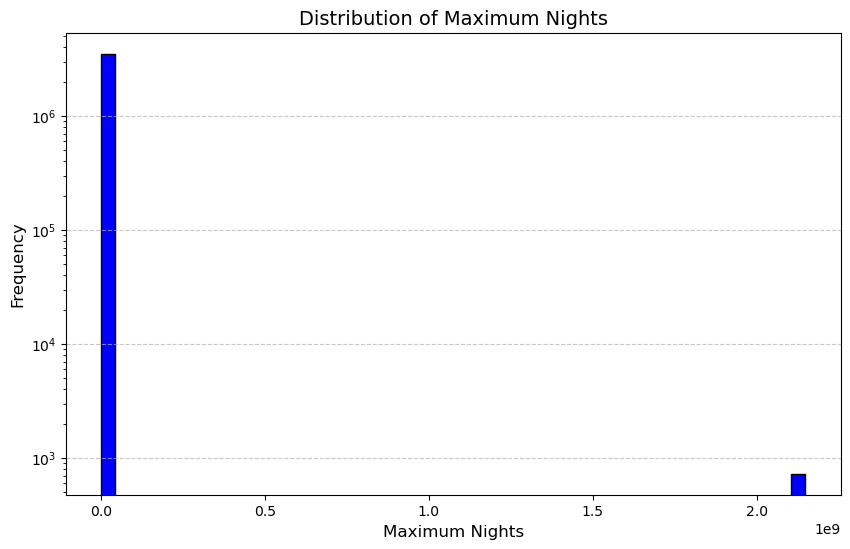

In [4]:
import matplotlib.pyplot as plt

data['maximum_nights'] = pd.to_numeric(data['maximum_nights'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(data['maximum_nights'], bins=50, color='blue', edgecolor='black',log=True)
plt.title('Distribution of Maximum Nights', fontsize=14)
plt.xlabel('Maximum Nights', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:

# Removing the dollar sign and commas, then converting 'price' to numeric
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Filtering out outliers in 'maximum_nights' where the value is greater than 10,000
data = data[data['maximum_nights'] <= 10000]

# Converting the 'available' column from 't' and 'f' to 1 and 0
data['available'] = data['available'].map({'t': 1, 'f': 0})

In [6]:
data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2024-09-06,0,69.0,NaN,3.0,1125.0
1,2818,2024-09-07,0,69.0,NaN,3.0,1125.0
2,2818,2024-09-08,0,69.0,NaN,3.0,1125.0
3,2818,2024-09-09,0,69.0,NaN,3.0,1125.0
4,2818,2024-09-10,1,69.0,NaN,3.0,1125.0


In [7]:
data.to_csv('calendar_cleaned.csv', index=False)

### Listings dataset

In [8]:
import pandas as pd

# Load the Airbnb listings dataset
file_path = 'listings.csv'
airbnb_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for initial inspection
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,83.0,3,389,2024-08-31,2.07,1,105,35,0363 5F3A 5684 6750 D14D
1,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155.0,3,279,2024-09-03,1.81,1,193,18,0363 974D 4986 7411 88D8
2,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,79.0,2,638,2024-09-03,3.73,2,74,100,0363 607B EA74 0BD8 2F6F
3,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,59.0,2,761,2024-09-04,4.64,2,91,84,0363 607B EA74 0BD8 2F6F
4,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan,NaN,Centrum-Oost,52.37168,4.91471,Entire home/apt,NaN,3,42,2022-08-20,0.25,1,0,0,0363 E76E F06A C1DD 172C


# Dataset Explanation

| Column Name                    | Description                                                                 | Type           |
|--------------------------------|-----------------------------------------------------------------------------|----------------|
| id                             | A unique identifier for each Airbnb listing.                                | Integer        |
| name                           | The name or title of the Airbnb listing.                                    | Text/String    |
| host_id                        | A unique identifier for each host.                                          | Integer        |
| host_name                      | The name of the host managing the listing.                                  | Text/String    |
| neighbourhood_group            | The broad geographic area or borough of the listing.                        | Text/String    |
| neighbourhood                  | A more specific neighborhood or district within the broader group.          | Text/String    |
| latitude                       | The geographic latitude of the listing.                                     | Float/Decimal  |
| longitude                      | The geographic longitude of the listing.                                    | Float/Decimal  |
| room_type                      | The type of accommodation offered.                                          | Categorical    |
| price                          | The nightly price of the listing in the local currency.                     | Integer/Float  |
| minimum_nights                 | The minimum number of nights required for a booking.                        | Integer        |
| number_of_reviews              | The total number of reviews the listing has received.                       | Integer        |
| last_review                    | The date of the most recent review for the listing.                         | Date/Datetime  |
| reviews_per_month              | The average number of reviews the listing receives per month.               | Float/Decimal  |
| calculated_host_listings_count | The total number of active listings managed by the same host.               | Integer        |
| availability_365               | The number of days the listing is available for booking in a year.          | Integer        |
| number_of_reviews_ltm          | The number of reviews the listing has received in the last 12 months.       | Integer        |
| license                        | The license or registration number associated with the listing.             | Text/String    |


In [9]:
# Summary statistics of the dataset
summary_stats = airbnb_data.describe(include='all')

# Checking for missing values in the dataset
missing_values = airbnb_data.isnull().sum()

# Displaying the summary statistics and missing values
summary_stats

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,9.659000e+03,9659,9.659000e+03,9659,0.0,9659,9659.000000,9659.000000,9659,5869.000000,9659.000000,9659.000000,8632,8632.000000,9659.000000,9659.000000,9659.000000,9562
unique,NaN,9437,NaN,3601,NaN,22,NaN,NaN,4,NaN,NaN,NaN,1207,NaN,NaN,NaN,NaN,8392
top,NaN,Appartement in Amsterdam,NaN,David,NaN,De Baarsjes - Oud-West,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2024-08-25,NaN,NaN,NaN,NaN,Exempt
freq,NaN,15,NaN,56,NaN,1655,NaN,NaN,7776,NaN,NaN,NaN,244,NaN,NaN,NaN,NaN,693
mean,4.583572e+17,NaN,1.213571e+08,NaN,NaN,NaN,52.366594,4.889761,NaN,289.639121,4.215343,45.636919,NaN,1.074291,1.798426,88.643338,9.370846,NaN
std,4.837813e+17,NaN,1.608260e+08,NaN,NaN,NaN,0.017328,0.035550,NaN,1216.784725,19.845051,118.572029,NaN,2.206133,2.879770,116.173761,24.959353,NaN
min,2.818000e+03,NaN,3.159000e+03,NaN,NaN,NaN,52.290276,4.755870,NaN,11.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.217078e+07,NaN,1.165785e+07,NaN,NaN,NaN,52.355610,4.864693,NaN,164.000000,2.000000,3.000000,NaN,0.240000,1.000000,0.000000,0.000000,NaN
50%,5.365568e+07,NaN,4.113008e+07,NaN,NaN,NaN,52.365569,4.887649,NaN,225.000000,3.000000,10.000000,NaN,0.480000,1.000000,22.000000,2.000000,NaN
75%,9.330041e+17,NaN,1.690638e+08,NaN,NaN,NaN,52.376405,4.909200,NaN,321.000000,4.000000,32.000000,NaN,1.020000,1.000000,158.000000,7.000000,NaN


In [10]:
missing_values

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               9659
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3790
minimum_nights                       0
number_of_reviews                    0
last_review                       1027
reviews_per_month                 1027
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             97
dtype: int64

In [11]:
missing_prices_ids = airbnb_data[airbnb_data['price'].isna()]['id'].tolist()


In [12]:
# Filter rows in `data` for `listing_id` matching the missing prices
filtered_calendar = data[data['listing_id'].isin(missing_prices_ids)]

In [13]:
# Extract the earliest available price for each `listing_id`
exact_price_mapping = filtered_calendar.groupby('listing_id')['price'].first()

In [14]:
# Update the missing prices in airbnb_data
airbnb_data['price'] = airbnb_data.apply(
    lambda row: exact_price_mapping[row['id']] if pd.isna(row['price']) and row['id'] in exact_price_mapping else row['price'],
    axis=1
)

In [15]:
# Display the updated dataframe or save it as needed
print(airbnb_data.head())

      id                                               name  host_id  \
0   2818          Quiet Garden View Room & Super Fast Wi-Fi     3159   
1  27886  Romantic, stylish B&B houseboat in canal district    97647   
2  28871                            Comfortable double room   124245   
3  29051                            Comfortable single room   124245   
4  44391    Quiet 2-bedroom Amsterdam city centre apartment   194779   

  host_name  neighbourhood_group                           neighbourhood  \
0    Daniel                  NaN  Oostelijk Havengebied - Indische Buurt   
1      Flip                  NaN                            Centrum-West   
2     Edwin                  NaN                            Centrum-West   
3     Edwin                  NaN                            Centrum-Oost   
4       Jan                  NaN                            Centrum-Oost   

   latitude  longitude        room_type  price  minimum_nights  \
0  52.36435    4.94358     Private room   83

In [16]:
# Checking for missing values in the dataset
missing_values = airbnb_data.isnull().sum()

In [17]:
missing_values

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               9659
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                1
minimum_nights                       0
number_of_reviews                    0
last_review                       1027
reviews_per_month                 1027
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             97
dtype: int64

In [18]:
missing_id = airbnb_data[airbnb_data['price'].isna()]['id'].iloc[0]
print(data[data['listing_id'] == missing_id])


Empty DataFrame
Columns: [listing_id, date, available, price, adjusted_price, minimum_nights, maximum_nights]
Index: []


In [19]:
missing_id

1080404443702621682

In [20]:
# Drop the row with the missing price from `airbnb_data`
airbnb_data_cleaned = airbnb_data[airbnb_data['id'] != missing_id]

# Drop rows with the same `listing_id` from `data`
data_cleaned = data[data['listing_id'] != missing_id]

In [21]:
missing_values = data_cleaned.isnull().sum()
missing_values2 = airbnb_data.isnull().sum()

In [22]:
missing_values


listing_id              0
date                    0
available               0
price                   0
adjusted_price    3524444
minimum_nights          0
maximum_nights          0
dtype: int64

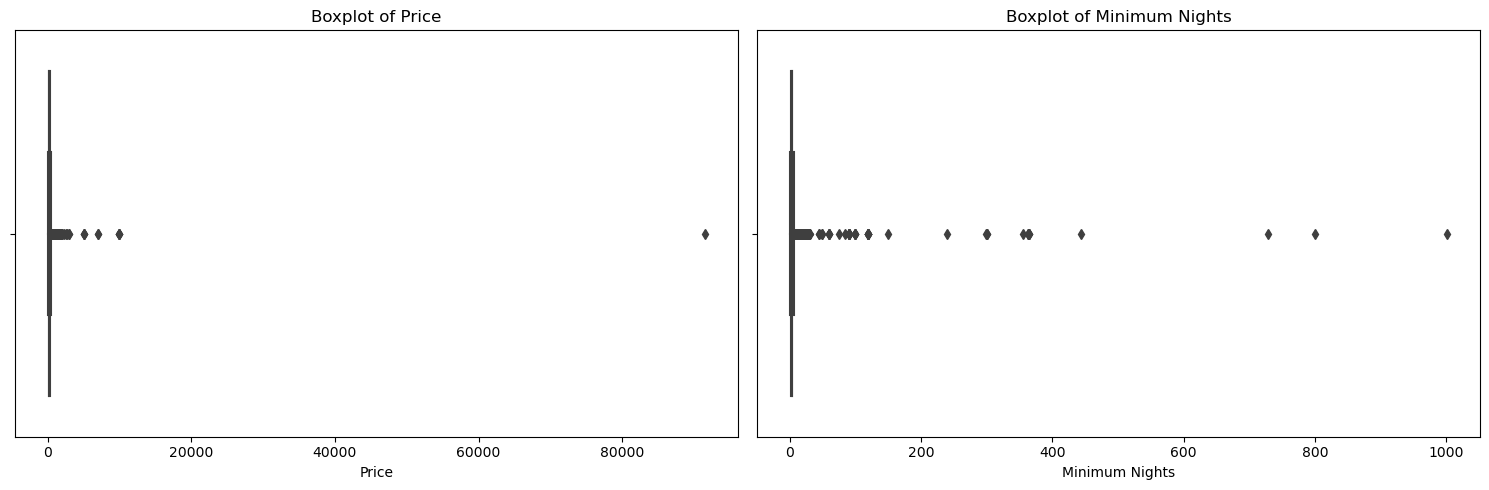

(484, 380)

In [24]:
import matplotlib.pyplot as plt

import seaborn as sns

# Identifying outliers in 'price' and 'minimum_nights' using boxplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot for 'price'
sns.boxplot(data=airbnb_data, x='price', ax=axes[0])
axes[0].set_title('Boxplot of Price')
axes[0].set_xlabel('Price')

# Boxplot for 'minimum_nights'
sns.boxplot(data=airbnb_data, x='minimum_nights', ax=axes[1])
axes[1].set_title('Boxplot of Minimum Nights')
axes[1].set_xlabel('Minimum Nights')

plt.tight_layout()
plt.show()

# Quantifying the outliers using interquartile range (IQR)
def identify_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

price_outliers = identify_outliers(airbnb_data['price'].dropna())
min_nights_outliers = identify_outliers(airbnb_data['minimum_nights'])

len(price_outliers), len(min_nights_outliers)


In [25]:
# # Remove rows where price is greater than 80,000 (we care about 1 observation)
airbnb_data = airbnb_data[airbnb_data['price'] <= 80000]

In [26]:
airbnb_data['license'] = airbnb_data['license'].fillna('No license info')

### Feature Engineering - Distance to Center

In [27]:
print(airbnb_data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [28]:
from geopy.distance import geodesic


# Add a new feature for the distance to Amsterdam center - Dam Square
amsterdam_center = (52.3676, 4.9041)

def calculate_distance_to_center(row):
    listing_coords = (row['latitude'], row['longitude'])
    return geodesic(listing_coords, amsterdam_center).km

airbnb_data['distance_to_center'] = airbnb_data.apply(calculate_distance_to_center, axis=1)

In [29]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,distance_to_center
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,83.0,3,389,2024-08-31,2.07,1,105,35,0363 5F3A 5684 6750 D14D,2.713449
1,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155.0,3,279,2024-09-03,1.81,1,193,18,0363 974D 4986 7411 88D8,2.377028
2,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,79.0,2,638,2024-09-03,3.73,2,74,100,0363 607B EA74 0BD8 2F6F,0.897897
3,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,59.0,2,761,2024-09-04,4.64,2,91,84,0363 607B EA74 0BD8 2F6F,0.906234
4,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan,NaN,Centrum-Oost,52.37168,4.91471,Entire home/apt,240.0,3,42,2022-08-20,0.25,1,0,0,0363 E76E F06A C1DD 172C,0.853433


In [30]:
# Check the data type of the 'last_review' column before conversion
print("Before conversion:")
print(airbnb_data['last_review'].dtype)

# Convert 'last_review' column to datetime format
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'], errors='coerce')

# Check the data type after conversion
print("\nAfter conversion:")
print(airbnb_data['last_review'].dtype)

# Display any rows where conversion failed (NaT indicates failed conversions to check the missing values!)
failed_conversions = airbnb_data[airbnb_data['last_review'].isna()]
print(f"\nNumber of rows where 'last_review' could not be converted: {len(failed_conversions)}")


Before conversion:
object

After conversion:
datetime64[ns]

Number of rows where 'last_review' could not be converted: 1026


In [31]:
airbnb_data.to_csv('listings_cleaned.csv', index=False)

print("Cleaned dataset has been exported as 'listings_cleaned.csv'.")

### Neighbourhood Dataset

In [35]:
import pandas as pd

# Load the Airbnb neighbourhoods dataset
file_path = 'neighbourhoods.csv'
airbnb_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for initial inspection
airbnb_data.head()

,neighbourhood_group,neighbourhood
0,NaN,Bijlmer-Centrum
1,NaN,Bijlmer-Oost
2,NaN,Bos en Lommer
3,NaN,Buitenveldert - Zuidas
4,NaN,Centrum-Oost


In [36]:
# Summary statistics of the dataset
summary_stats = airbnb_data.describe(include='all')

# Checking for missing values in the dataset
missing_values = airbnb_data.isnull().sum()

# Displaying the summary statistics and missing values
summary_stats

,neighbourhood_group,neighbourhood
count,0.0,22
unique,NaN,22
top,NaN,Bijlmer-Centrum
freq,NaN,1
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN


In [37]:
print(missing_values)

neighbourhood_group    22
neighbourhood           0
dtype: int64


### Reviews dataset

In [57]:
import pandas as pd
# Load the dataset
file_path = 'reviews.csv.gz'
reviews_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [58]:
# Basic dataset information
eda_info = {
    "Dataset Shape": reviews_data.shape,
    "Columns": reviews_data.columns.tolist(),
    "Missing Values": reviews_data.isnull().sum(),
    "Data Types": reviews_data.dtypes
}

eda_info


{'Dataset Shape': (440807, 6),
 'Columns': ['listing_id',
  'id',
  'date',
  'reviewer_id',
  'reviewer_name',
  'comments'],
 'Missing Values': listing_id        0
 id                0
 date              0
 reviewer_id       0
 reviewer_name     0
 comments         25
 dtype: int64,
 'Data Types': listing_id        int64
 id                int64
 date             object
 reviewer_id       int64
 reviewer_name    object
 comments         object
 dtype: object}

In [59]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

review_column = 'comments'

def detect_language_safe(text):
    try:
        # Ensure the input is a string and detect language
        if isinstance(text, str) and text.strip():  # Check for non-empty strings
            return detect(text)
        else:
            return "unknown"
    except LangDetectException:
        return "unknown"

# Apply the language detection safely
reviews_data['language'] = reviews_data['comments'].apply(detect_language_safe)

# Filter non-English reviews into a separate DataFrame
non_english_reviews = reviews_data[reviews_data['language'] != 'en']



In [60]:
# Filter English reviews into a separate DataFrame
english_reviews = reviews_data[reviews_data['language'] == 'en']

In [61]:
english_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,en
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,en
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,en
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,en
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,en
...,...,...,...,...,...,...,...
440801,1217850937891107605,1226006884646540496,2024-08-18,594966020,Max,Friendly host and good place if you are lookin...,en
440802,1220731757489855109,1225961080383327080,2024-08-18,280303344,Sam,Had a really nice stay in this apartment. It w...,en
440803,1221126358102458113,1232467925705111332,2024-08-27,173184452,Safha,"Firstly, I would like to mention that Sophie w...",en
440804,1221572481595092953,1231032436164053035,2024-08-25,135619385,Nicole,This stay did not disappoint! <br/>We couldn’t...,en


In [62]:
non_english_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
68,2818,6798865,2013-08-25,8239676,Frédéric,Daniel est très hospitalier. Il est amical et ...,fr
70,2818,9600146,2014-01-03,10075270,Raphaël,Super séjour à Amsterdam et ce en partie grâce...,fr
75,2818,13041264,2014-05-18,14368839,Alexa,Sehr saubere und gepflegte Wohnung. Daniel war...,de
79,2818,15331290,2014-07-07,16246003,Valerio,Tutto perfetto...\r<br/>\r<br/>Grazie mille,it
81,2818,15958467,2014-07-19,15927333,Daniel,Un séjour remarquable ! Daniel est un hôte so...,fr
...,...,...,...,...,...,...,...
440787,1223872268249175521,1236168416108451518,2024-09-01,471709876,Hadi,Einfach toll,de
440790,1227519933159014616,1231076277685896570,2024-08-25,211498396,Gokhan,very nice,cs
440793,1216609263586519358,1231103537959405232,2024-08-25,38923213,Jonas,Amazing!!,tl
440795,1216763353109237119,1236095293241766691,2024-09-01,5558937,Stefano,Perfetta soluzione per vivere Amsterdam in pie...,it


In [63]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
import re

# Download required NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

sia = SentimentIntensityAnalyzer()
# Enhanced stopwords (add more custom stopwords as needed)
additional_stopwords = {'us','would', 'could'}

# Preprocessing function to remove HTML tags, unwanted tokens, stopwords, punctuation, and lowercasing
def preprocess_text(text):
    # Remove HTML tags (e.g., <br/>)
    text = re.sub(r'<.*?>', '', text)
    
    # Replace unwanted characters like curly quotes, smart quotes, etc.
    text = re.sub(r'[’‘“”]', '', text)  # Removing curly apostrophes, quotes
    
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize

    # Remove stopwords, punctuation, and unwanted tokens (like 'br/')
    stop_words = set(stopwords.words('english')).union(additional_stopwords)
    cleaned_tokens = [
        word for word in tokens if word not in stop_words 
        and word not in string.punctuation
    ]
    
    # Return the cleaned text
    return ' '.join(cleaned_tokens)

# Filter English reviews
english_reviews = reviews_data[reviews_data['language'] == 'en']

# Preprocess the text (removing HTML tags, unwanted tokens, stopwords, punctuation, etc.)
english_reviews['cleaned_comments'] = english_reviews['comments'].apply(preprocess_text)

# Apply VADER sentiment analysis on the preprocessed text
english_reviews['sentiment_score'] = english_reviews['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/georgetsoupras/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/georgetsoupras/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/georgetsoupras/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/gv/h_09lf691slg0vdblbxjtywc0000gn/T/ipykernel_32962/1456144291.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_reviews['cleaned_comments'] = english_reviews['comments'].apply(preprocess_text)
/var/folders/gv/h_09lf691slg0vdblbxjtywc0000gn/T/ipykernel_32962/1456144291.py:46: Se

In [64]:
# Function to classify sentiment as Positive, Neutral, or Negative
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment classification
english_reviews['sentiment'] = english_reviews['sentiment_score'].apply(classify_sentiment)


/var/folders/gv/h_09lf691slg0vdblbxjtywc0000gn/T/ipykernel_32962/981183861.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_reviews['sentiment'] = english_reviews['sentiment_score'].apply(classify_sentiment)


In [65]:
from collections import Counter
# 1. Count how many Positive, Neutral, and Negative sentiments
sentiment_counts = english_reviews['sentiment'].value_counts()

# 2. Count the most frequent words (excluding stopwords and punctuation)
all_words = ' '.join(english_reviews['cleaned_comments']).split()
word_counts = Counter(all_words)

# Get the most common words (top 10)
most_common_words = word_counts.most_common(10)

# Results
sentiment_counts, most_common_words


(sentiment
 Positive    318768
 Neutral       2764
 Negative      2007
 Name: count, dtype: int64,
 [('great', 181586),
  ('stay', 158891),
  ('place', 147511),
  ('location', 120705),
  ('amsterdam', 117568),
  ('apartment', 103145),
  ('nice', 89424),
  ('host', 81305),
  ('clean', 77218),
  ('recommend', 70720)])

In [66]:
# Separate positive and negative reviews
positive_reviews = english_reviews[english_reviews['sentiment'] == 'Positive']
negative_reviews = english_reviews[english_reviews['sentiment'] == 'Negative']

# Function to get the most frequent words from a given DataFrame of reviews
def get_most_frequent_words(reviews_df):
    all_words = ' '.join(reviews_df['cleaned_comments']).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(10)  # Get top 10 most frequent words

# Get most frequent words for positive and negative reviews
most_frequent_positive_words = get_most_frequent_words(positive_reviews)
most_frequent_negative_words = get_most_frequent_words(negative_reviews)

# Results
sentiment_counts = english_reviews['sentiment'].value_counts()

sentiment_counts

sentiment
Positive    318768
Neutral       2764
Negative      2007
Name: count, dtype: int64

In [67]:
most_frequent_positive_words

[('great', 181372),
 ('stay', 157802),
 ('place', 146296),
 ('location', 119905),
 ('amsterdam', 116892),
 ('apartment', 102222),
 ('nice', 89125),
 ('host', 80595),
 ('clean', 77007),
 ('recommend', 70548)]

In [68]:
most_frequent_negative_words

[('room', 740),
 ('place', 705),
 ('stay', 665),
 ('apartment', 658),
 ('host', 559),
 ('location', 461),
 ('one', 370),
 ('night', 348),
 ('airbnb', 344),
 ('amsterdam', 342)]

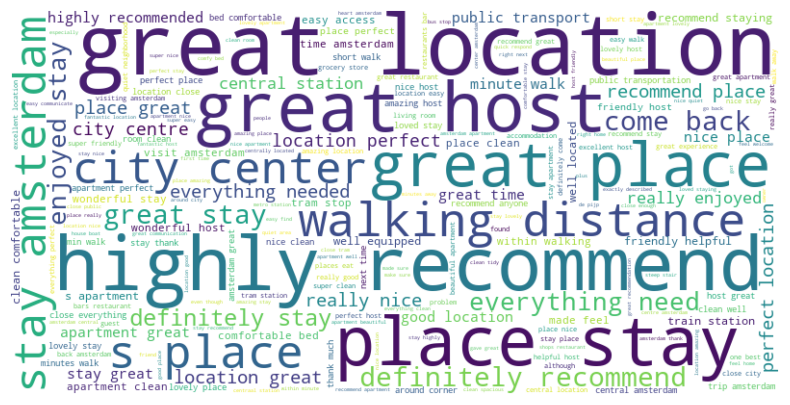

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the cleaned comments into one large text
all_comments = ' '.join(english_reviews['cleaned_comments'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


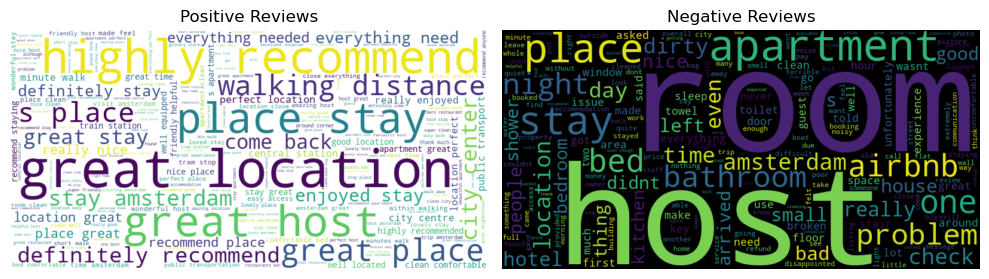

In [70]:
##### from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews based on sentiment scores
positive_reviews = english_reviews[english_reviews['sentiment_score'] > 0.05]
negative_reviews = english_reviews[english_reviews['sentiment_score'] < -0.05]

# Combine the cleaned comments into one string for each category
positive_text = " ".join(positive_reviews['cleaned_comments'])
negative_text = " ".join(negative_reviews['cleaned_comments'])

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plotting the word clouds
plt.figure(figsize=(10, 5))

# Plot positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

# Plot negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

# Display the plots
plt.tight_layout()
plt.show()


In [71]:
english_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,cleaned_comments,sentiment_score,sentiment
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,en,daniel really cool place nice clean quiet neig...,0.8754,Positive
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,en,daniel amazing host place extremely clean prov...,0.9626,Positive
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,en,great time amsterdam daniel excellent host fri...,0.9661,Positive
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,en,professional operation room clean comfortable ...,0.9674,Positive
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,en,daniel highly recommended provided necessities...,0.9230,Positive
...,...,...,...,...,...,...,...,...,...,...
440801,1217850937891107605,1226006884646540496,2024-08-18,594966020,Max,Friendly host and good place if you are lookin...,en,friendly host good place looking little quiet ...,0.8225,Positive
440802,1220731757489855109,1225961080383327080,2024-08-18,280303344,Sam,Had a really nice stay in this apartment. It w...,en,really nice stay apartment modern really nice ...,0.8685,Positive
440803,1221126358102458113,1232467925705111332,2024-08-27,173184452,Safha,"Firstly, I would like to mention that Sophie w...",en,firstly like mention sophie went way make feel...,0.9877,Positive
440804,1221572481595092953,1231032436164053035,2024-08-25,135619385,Nicole,This stay did not disappoint! <br/>We couldn’t...,en,stay disappoint couldnt asked better location ...,0.8898,Positive


In [72]:
 # Check for null values in each column
null_values = english_reviews.isnull().sum()

# Display the result
print(null_values)


listing_id          0
id                  0
date                0
reviewer_id         0
reviewer_name       0
comments            0
language            0
cleaned_comments    0
sentiment_score     0
sentiment           0
dtype: int64


In [74]:
# Filter the DataFrame for positive sentiment
positive_reviews = english_reviews[english_reviews['sentiment'] == 'Positive']

# Save the filtered DataFrames to separate CSV files
positive_reviews.to_csv('positive_reviews.csv', index=False)



print("CSV file created successfully!")


CSV files created successfully!


In [55]:
output_path = 'english_reviews.csv' 
english_reviews.to_csv(output_path, index=False)

print(f"Sentiment summary saved to: {output_path}")

Sentiment summary saved to: english_reviews.csv


### External Dataset

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'statistic_id1480646_monthly-domestic-tourist-overnight-stays-in-hotels-in-amsterdam-2019-2024.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the second sheet, which contains the data
data_sheet = excel_data.parse(sheet_name='Data')

# Skip unnecessary rows at the top to get to the actual data
data = data_sheet.iloc[4:]  # Start processing from row 5 (index 4)

# Reset the index for further processing
data.reset_index(drop=True, inplace=True)

# Drop unnecessary columns and rename the columns
data = data.iloc[:, 1:8]  # Use columns for Month and Years (2019-2024)
data.columns = ['Month', '2019', '2020', '2021', '2022', '2023', '2024']

# Drop empty rows or columns, if any
data.dropna(how='all', inplace=True)

# Melt the data into long format (Month, Year, Value)
data_melted = data.melt(id_vars=['Month'], var_name='Year', value_name='Value')

# Drop rows with problematic or missing values in the 'Value' column
data_melted = data_melted[data_melted['Value'] != '-']  # Remove rows with '-' in Value
data_melted.dropna(subset=['Value'], inplace=True)

# Convert Year and Value to numeric
data_melted['Year'] = data_melted['Year'].astype(int)
data_melted['Value'] = data_melted['Value'].astype(int)

# Remove rows where Year is 2024
data_cleaned = data_melted[data_melted['Year'] != 2024]

# Sort by Year and Month
data_cleaned = data_cleaned.sort_values(by=['Year', 'Month'])

# Save the cleaned data as a CSV file
cleaned_file_path = 'cleaned_tourist_data.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to cleaned_tourist_data.csv
